source: https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/

## Exploring Dataset

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

In [8]:
df = pd.read_csv('all-data (1).csv', encoding='ISO-8859-1',
                names=['Sentiment', 'Headline'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Headline   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [9]:
df.head()

,Sentiment,Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [11]:
df.isnull().sum()

Sentiment    0
Headline     0
dtype: int64

In [21]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

## Feature Extraction

In [22]:
# targeted label
y = df['Sentiment'].values
y.shape

(4846,)

In [47]:
# x values
x = df['Headline'].values
x.shape

(4846,)

In [48]:
# splitting train and test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                   test_size=0.3)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (3392,)
X_test : (1454,)
y_train : (3392,)
y_test : (1454,)


In [54]:
# creating df_train and df_test

# df train
df_1 = pd.DataFrame(X_train)
df_1 = df_1.rename(columns={0:'news'})
df_2 = pd.DataFrame(y_train)
df_2 = df_2.rename(columns={0:'sentiment'})
df_train = pd.concat([df_1, df_2], axis=1)

# df test
df_3 = pd.DataFrame(X_test)
df_3 = df_3.rename(columns={0:'news'})
df_4 = pd.DataFrame(y_test)
df_4 = df_4.rename(columns={0:'sentiment'})
df_test = pd.concat([df_3, df_4], axis=1)

In [71]:
df_train.head()

,news,sentiment
0,mr skogster currently serves manager responsib...,neutral
1,finnish insurance company fennia kesko group e...,negative
2,finnish house manufacturers targeting strongly...,neutral
3,gypsii mobile social networking application av...,neutral
4,group intends relocate warehouse office space ...,neutral


In [72]:
df_test.head()

,news,sentiment
0,nokia also noted average selling price handset...,positive
1,megafon subscriber base increased 161 2009 50...,positive
2,revenue july september grew 21 percent euro 23...,positive
3,service developed digia facilitates work resou...,neutral
4,policy also aimed making companies profitable ...,positive


## Pre-Processing

In [63]:
!pip install nltk

In [179]:
import re
import string
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stop_words = stopwords.words('English')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [188]:
def preprocessing(sentence):
    
    #lowecasing
    sentence = sentence.lower()
    
    #remove white spaces
    sentence = sentence.strip()
    
    #tokenization
    words = sentence.split()
    
    #remove punctuation/ special character
    remove_table = str.maketrans("", "", punctuation)
    words = [x.translate(remove_table) for x in words]
    
    #remove stopwords
    words = [x for x in words if x not in stop_words]
    
    #stemming
    words = [ps.stem(x) for x in words]
    
    #rejoining the words
    sentence = " ".join(words)
    
    return sentence

In [189]:
# Test
text = 'The sun rises in the east but the judgement day has come and the sun rises from the west'
text = preprocessing(text)
print(text)

sun rise east judgement day come sun rise west


In [190]:
df_train['news'] = [preprocessing(stc) for stc in df_train['news']]
df_test['news'] = [preprocessing(stc) for stc in df_test['news']]

## Code to generate n-grams

Params:
- text-the text for which we have to generate n-grams
- ngram-number of grams to be generated from the text(1,2,3,4, etc., default value=1)

In [192]:
def generate_n_gram(text, ngram=1):
    words=[word for word in text.split()]
    temp=zip(*[words[i:] for i in range(0, ngram)])
    result=[' '.join(ngram) for ngram in temp]
    return result

In [191]:
# Sample
generate_n_gram('The sun rises in the east bur suddenly the judgement day has come and the sun rises from the opposite',2)

Sentence : ['The', 'sun', 'rises', 'in', 'the', 'east', 'bur', 'suddenly', 'the', 'judgement', 'day', 'has', 'come', 'and', 'the', 'sun', 'rises', 'from', 'the', 'opposite']


['The sun',
 'sun rises',
 'rises in',
 'in the',
 'the east',
 'east bur',
 'bur suddenly',
 'suddenly the',
 'the judgement',
 'judgement day',
 'day has',
 'has come',
 'come and',
 'and the',
 'the sun',
 'sun rises',
 'rises from',
 'from the',
 'the opposite']

## Creating Unigram

In [77]:
from collections import defaultdict

In [84]:
# get the count of every word in both the columns of df_train
positiveValues = defaultdict(int)
negativeValues = defaultdict(int)
neutralValues = defaultdict(int)

In [193]:
# get the count of every word in the columns of df_train where the sentiment is positive
for text in df_train[df_train.sentiment=='positive'].news:
    for word in generate_n_gram(text):
        positiveValues[word]+=1

In [194]:
# get the count of every word in the columns of df_train where the sentiment is negative
for text in df_train[df_train.sentiment=='negative'].news:
    for word in generate_n_gram(text):
        negativeValues[word]+=1

In [195]:
# get the count of every word in the columns of df_train where the sentiment is neutral
for text in df_train[df_train.sentiment=='neutral'].news:
    for word in generate_n_gram(text):
        neutralValues[word]+=1

In [196]:
# create a DF for each positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [197]:
# rename column
df_positive = df_positive.rename(columns={0:'text', 1:'count'})
df_negative = df_negative.rename(columns={0:'text', 1:'count'})
df_neutral = df_neutral.rename(columns={0:'text', 1:'count'})

In [198]:
# create top 10 in  each df
# i will not include the blank words ' ', beacuse it not a words.
pos10 = df_positive[1:11]
neg10 = df_negative[1:11]
net10 = df_neutral[1:11]

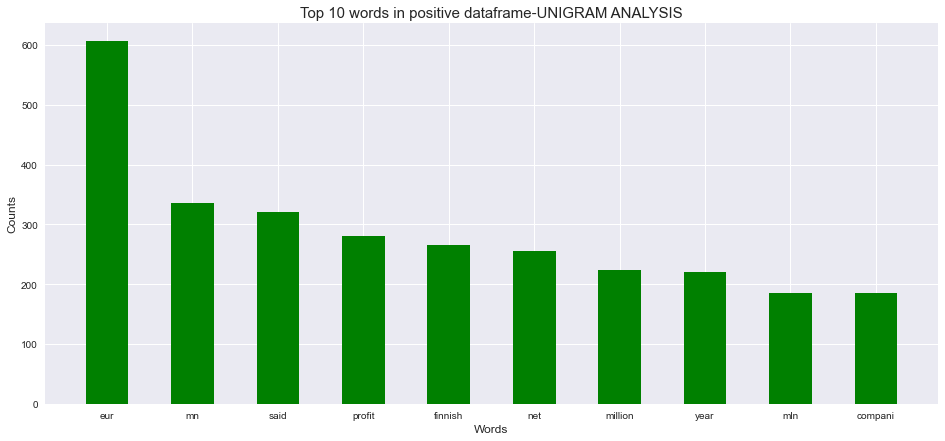

In [229]:
# visualize pos10
plt.figure(1, figsize=(16, 7))
plt.bar(pos10['text'],
       pos10['count'],
       color='green',
       width=0.5)
plt.xlabel('Words', size=12)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in positive dataframe-UNIGRAM ANALYSIS', size=15)
plt.savefig("positive-unigram.png", dpi=500)
plt.show()

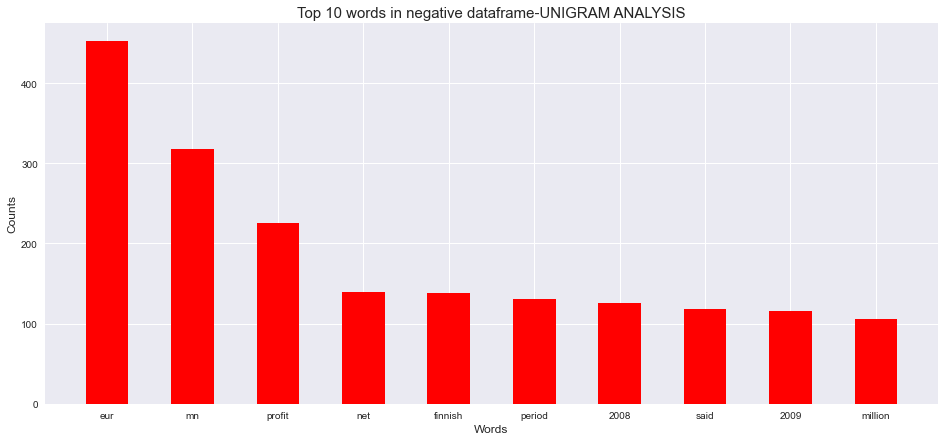

In [230]:
# visualize neg10
plt.figure(1, figsize=(16, 7))
plt.bar(neg10['text'],
       neg10['count'],
       color='red',
       width=0.5)
plt.xlabel('Words', size=12)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in negative dataframe-UNIGRAM ANALYSIS', size=15)
plt.savefig("negative-unigram.png", dpi=500)
plt.show()

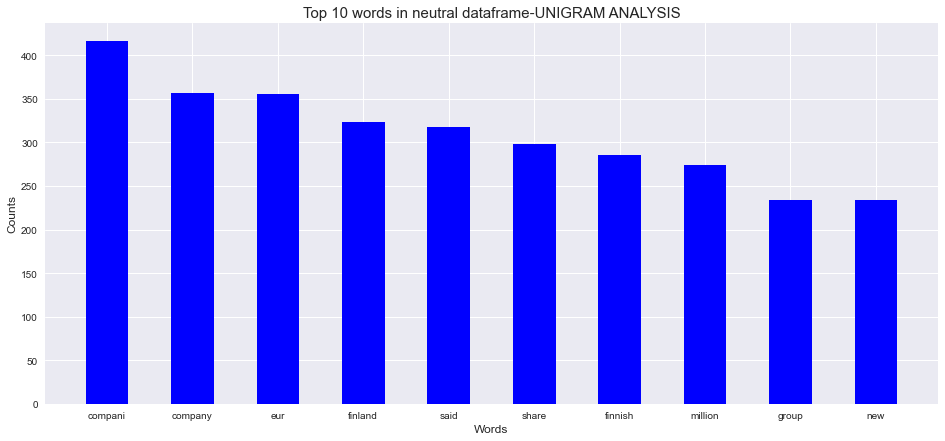

In [231]:
# visualize net10
plt.figure(1, figsize=(16, 7))
plt.bar(net10['text'],
       net10['count'],
       color='blue',
       width=0.5)
plt.xlabel('Words', size=12)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in neutral dataframe-UNIGRAM ANALYSIS', size=15)
plt.savefig("neutral-unigram.png", dpi=500)
plt.show()

## Create Bigrams

In [204]:
# get the count of every word in both the columns of df_train
positiveValues2 = defaultdict(int)
negativeValues2 = defaultdict(int)
neutralValues2 = defaultdict(int)

In [205]:
# get the count of every word in the columns of df_train where the sentiment is positive
for text in df_train[df_train.sentiment=='positive'].news:
    for word in generate_n_gram(text, 2):
        positiveValues2[word]+=1

In [206]:
# get the count of every word in the columns of df_train where the sentiment is negative
for text in df_train[df_train.sentiment=='negative'].news:
    for word in generate_n_gram(text, 2):
        negativeValues2[word]+=1

In [207]:
# get the count of every word in the columns of df_train where the sentiment is neutral
for text in df_train[df_train.sentiment=='neutral'].news:
    for word in generate_n_gram(text, 2):
        neutralValues2[word]+=1

In [208]:
# create a DF for each positiveValues,negativeValues and neutralValues
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

# rename column
df_positive2 = df_positive2.rename(columns={0:'text', 1:'count'})
df_negative2 = df_negative2.rename(columns={0:'text', 1:'count'})
df_neutral2 = df_neutral2.rename(columns={0:'text', 1:'count'})

# create top 10 in  each df
# i will not include the blank words ' ', beacuse it not a words.
pos210 = df_positive2[1:11]
neg210 = df_negative2[1:11]
net210 = df_neutral2[1:11]

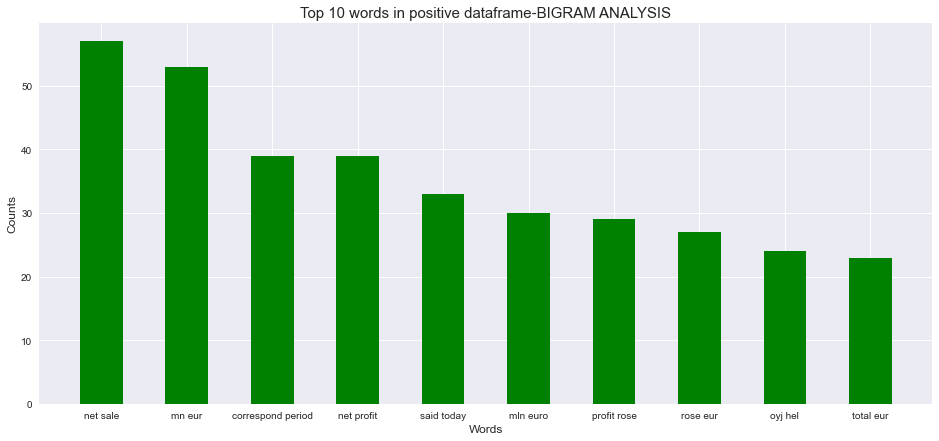

In [232]:
# visualize pos210
plt.figure(1, figsize=(16, 7))
plt.bar(pos210['text'],
       pos210['count'],
       color='green',
       width=0.5)
plt.xlabel('Words', size=12)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in positive dataframe-BIGRAM ANALYSIS', size=15)
plt.savefig("positive-bigram.png", dpi=500)
plt.show()

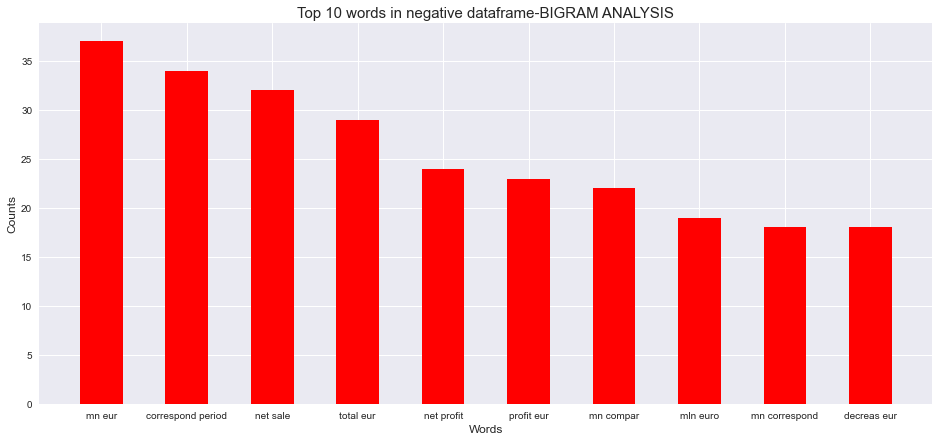

In [233]:
# visualize neg210
plt.figure(1, figsize=(16, 7))
plt.bar(neg210['text'],
       neg210['count'],
       color='red',
       width=0.5)
plt.xlabel('Words', size=12)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in negative dataframe-BIGRAM ANALYSIS', size=15)
plt.savefig("negative-bigram.png", dpi=500)
plt.show()

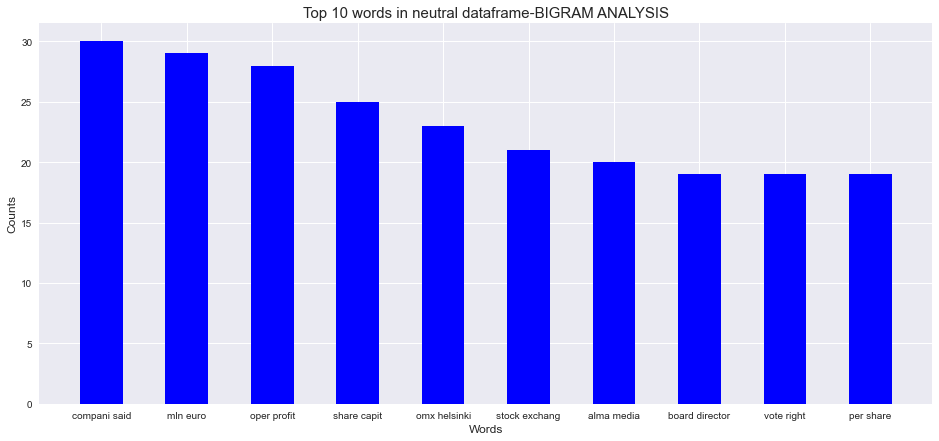

In [234]:
# visualize net210
plt.figure(1, figsize=(16, 7))
plt.bar(net210['text'],
       net210['count'],
       color='blue',
       width=0.5)
plt.xlabel('Words', size=12)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in neutral dataframe-BIGRAM ANALYSIS', size=15)
plt.savefig("neutral-bigram.png", dpi=500)
plt.show()

## Create Trigram

In [212]:
# get the count of every word in both the columns of df_train
positiveValues3 = defaultdict(int)
negativeValues3 = defaultdict(int)
neutralValues3 = defaultdict(int)

In [213]:
# get the count of every word in the columns of df_train where the sentiment is positive
for text in df_train[df_train.sentiment=='positive'].news:
    for word in generate_n_gram(text, 3):
        positiveValues3[word]+=1

In [214]:
# get the count of every word in the columns of df_train where the sentiment is negative
for text in df_train[df_train.sentiment=='negative'].news:
    for word in generate_n_gram(text, 3):
        negativeValues3[word]+=1

In [215]:
# get the count of every word in the columns of df_train where the sentiment is neutral
for text in df_train[df_train.sentiment=='neutral'].news:
    for word in generate_n_gram(text, 3):
        neutralValues3[word]+=1

In [216]:
# create a DF for each positiveValues,negativeValues and neutralValues
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

# rename column
df_positive3 = df_positive3.rename(columns={0:'text', 1:'count'})
df_negative3 = df_negative3.rename(columns={0:'text', 1:'count'})
df_neutral3 = df_neutral3.rename(columns={0:'text', 1:'count'})

# create top 10 in  each df
# i will not include the blank words ' ', beacuse it not a words.
pos310 = df_positive3[0:10]
neg310 = df_negative3[1:11]
net310 = df_neutral3[0:10]

In [217]:
df_neutral3.head()

,text,count
0,nasdaq omx helsinki,11
1,oper profit eur,11
2,net sale eur,10
3,annual gener meet,10
4,valu order eur,8


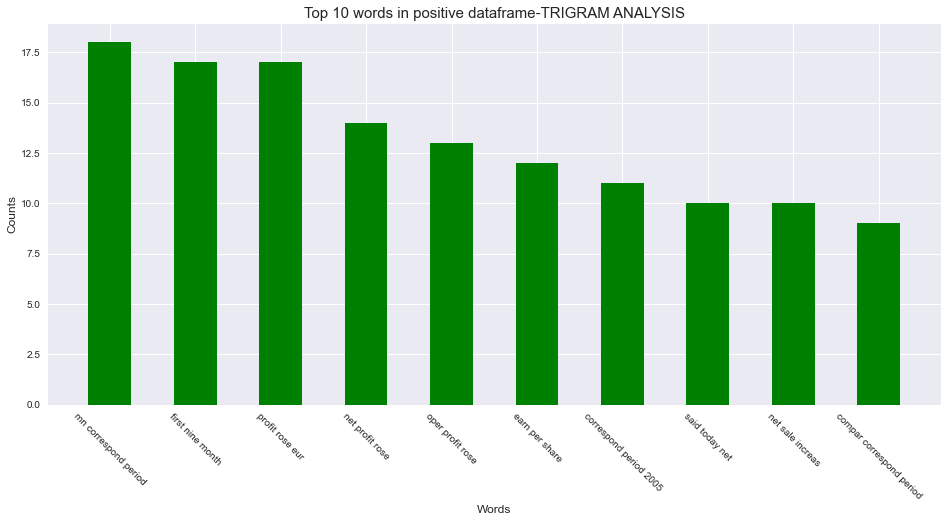

In [235]:
# visualize pos310
plt.figure(1, figsize=(16, 7))
plt.bar(pos310['text'],
       pos310['count'],
       color='green',
       width=0.5)
plt.xlabel('Words', size=12)
plt.xticks(rotation=-45)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in positive dataframe-TRIGRAM ANALYSIS', size=15)
plt.savefig("positive-trigram.png", dpi=500)
plt.show()

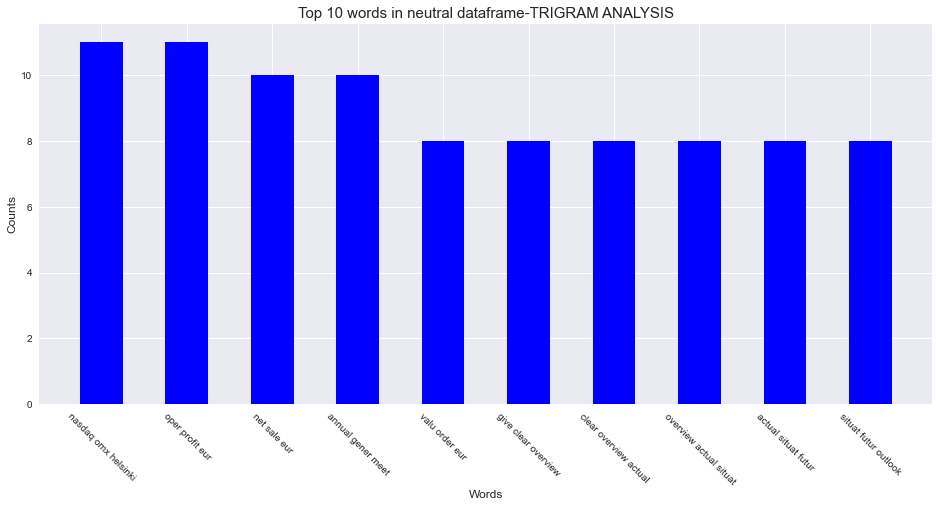

In [236]:
# visualize net310
plt.figure(1, figsize=(16, 7))
plt.bar(net310['text'],
       net310['count'],
       color='blue',
       width=0.5)
plt.xlabel('Words', size=12)
plt.xticks(rotation=-45)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in neutral dataframe-TRIGRAM ANALYSIS', size=15)
plt.savefig("neutral-trigram.png", dpi=500)
plt.show()

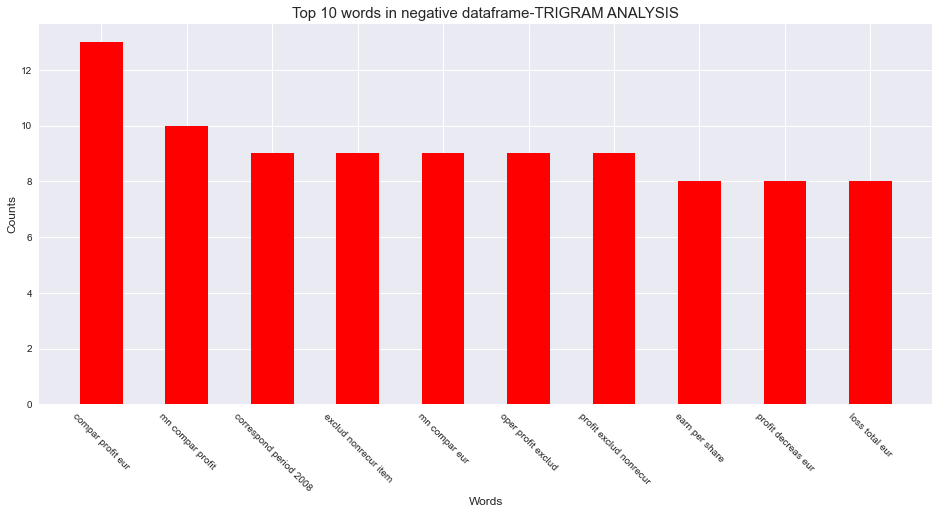

In [237]:
# visualize neg310
plt.figure(1, figsize=(16, 7))
plt.bar(neg310['text'],
       neg310['count'],
       color='red',
       width=0.5)
plt.xlabel('Words', size=12)
plt.xticks(rotation=-45)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in negative dataframe-TRIGRAM ANALYSIS', size=15)
plt.savefig("negative-trigram.png", dpi=500)
plt.show()

## Create 4gram

In [221]:
# get the count of every word in both the columns of df_train
positiveValues4 = defaultdict(int)
negativeValues4 = defaultdict(int)
neutralValues4 = defaultdict(int)

In [222]:
# get the count of every word in the columns of df_train where the sentiment is positive
for text in df_train[df_train.sentiment=='positive'].news:
    for word in generate_n_gram(text, 4):
        positiveValues4[word]+=1

In [223]:
# get the count of every word in the columns of df_train where the sentiment is neutral
for text in df_train[df_train.sentiment=='neutral'].news:
    for word in generate_n_gram(text, 4):
        neutralValues4[word]+=1

In [224]:
# get the count of every word in the columns of df_train where the sentiment is negative
for text in df_train[df_train.sentiment=='negative'].news:
    for word in generate_n_gram(text, 4):
        negativeValues4[word]+=1

In [225]:
# create a DF for each positiveValues,negativeValues and neutralValues
df_positive4=pd.DataFrame(sorted(positiveValues4.items(),key=lambda x:x[1],reverse=True))
df_negative4=pd.DataFrame(sorted(negativeValues4.items(),key=lambda x:x[1],reverse=True))
df_neutral4=pd.DataFrame(sorted(neutralValues4.items(),key=lambda x:x[1],reverse=True))

# rename column
df_positive4 = df_positive4.rename(columns={0:'text', 1:'count'})
df_negative4 = df_negative4.rename(columns={0:'text', 1:'count'})
df_neutral4 = df_neutral4.rename(columns={0:'text', 1:'count'})

# create top 10 in  each df
# i will not include the blank words ' ', beacuse it not a words.
pos410 = df_positive4[0:10]
neg410 = df_negative4[0:10]
net410 = df_neutral4[0:10]

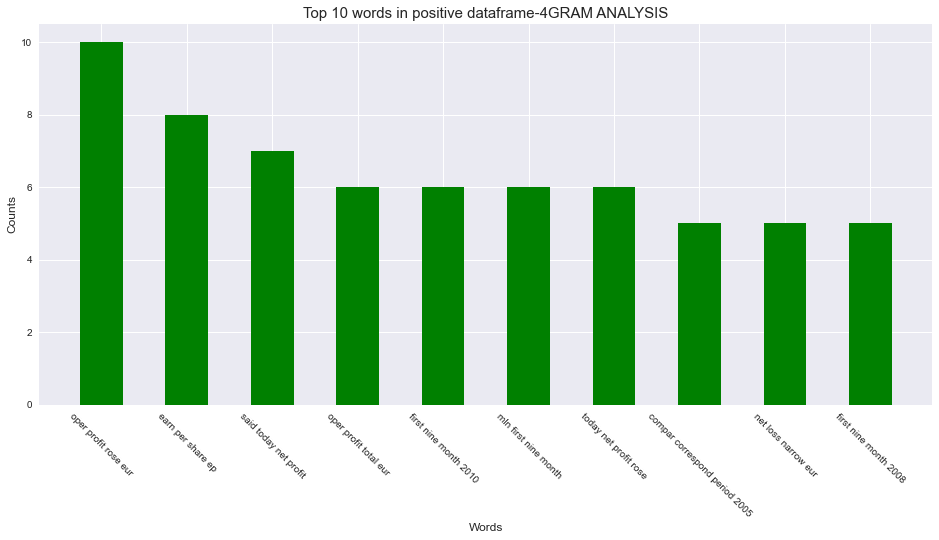

In [240]:
# visualize pos410
plt.figure(1, figsize=(16, 7))
plt.bar(pos410['text'],
       pos410['count'],
       color='green',
       width=0.5)
plt.xlabel('Words', size=12)
plt.xticks(rotation=-45)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in positive dataframe-4GRAM ANALYSIS', size=15)
plt.savefig("positive-4gram.png", dpi=500)
plt.show()

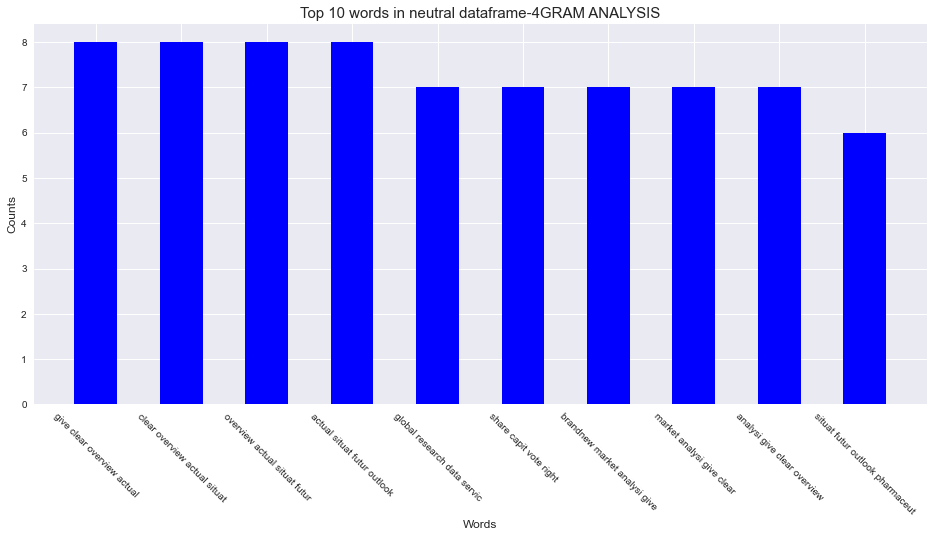

In [241]:
# visualize net410
plt.figure(1, figsize=(16, 7))
plt.bar(net410['text'],
       net410['count'],
       color='blue',
       width=0.5)
plt.xlabel('Words', size=12)
plt.xticks(rotation=-45)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in neutral dataframe-4GRAM ANALYSIS', size=15)
plt.savefig("neutral-4gram.png", dpi=500)
plt.show()

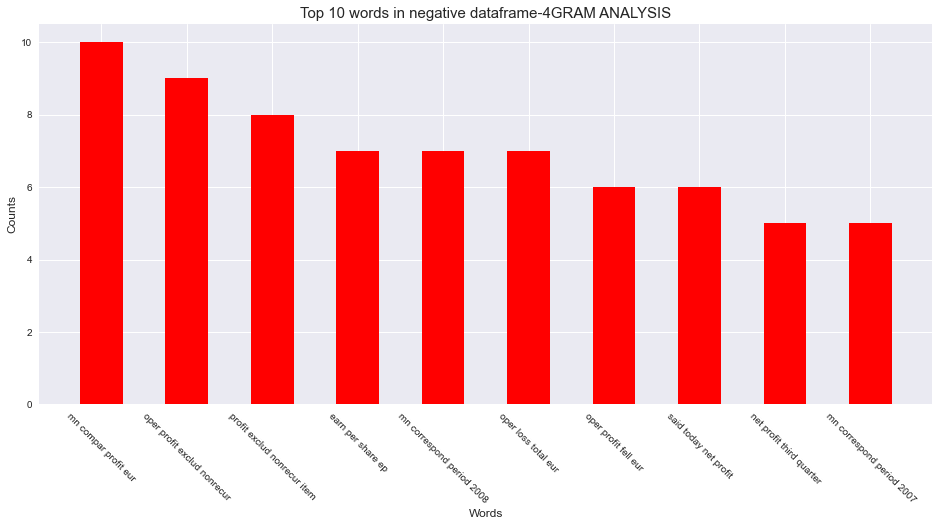

In [242]:
# visualize neg410
plt.figure(1, figsize=(16, 7))
plt.bar(neg410['text'],
       neg410['count'],
       color='red',
       width=0.5)
plt.xlabel('Words', size=12)
plt.xticks(rotation=-45)
plt.ylabel('Counts', size=12)
plt.title('Top 10 words in negative dataframe-4GRAM ANALYSIS', size=15)
plt.savefig("negative-4gram.png", dpi=500)
plt.show()